# Khám phá và mô hình hóa dữ liệu

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
from sklearn import set_config
set_config(display='diagram')

from datetime import datetime, timedelta
import re

## Setup toàn cục

In [2]:
# Format cho ngày tháng năm
date_format = '%Y-%m-%dT%H:%M:%SZ'
dateparse = lambda x: datetime.strptime(x, date_format)

# Ngày thu thập dữ liệu
collect_date_str = '2021-08-30T15:00:00Z'
collect_date = datetime.strptime(collect_date_str, date_format)

# Format cho độ dài thời gian
dura_format = 'PT%HH%MM%SS'

## Khám phá dữ liệu để tìm ra câu hỏi

In [3]:
video_df = pd.read_csv('data/videos_data.csv', 
                       sep='\t', 
                       parse_dates=['publishedAt'], # Phân tích thời gian cột 'publishedAt'
                       date_parser=dateparse, 
                       index_col=0) # Chọn cột 'id' làm index
video_df.head()

,title,publishedAt,thumbnailUrl,categoryId,defaultAudioLanguage,tags,viewCount,likeCount,dislikeCount,commentCount,...,publicStatsViewable,madeForKids,topicCategories,duration,dimension,definition,caption,licensedContent,contentRating,projection
id,,,,,,,,,,,,,,,,,,,,,
vuoaLan88i4,Making of Main Teri Mohabbat Mein /Jaane Jigar...,2021-08-29 09:42:39,https://i.ytimg.com/vi/vuoaLan88i4/default.jpg,10,hi,"['hindi songs', '2021 hindi songs', 'new hindi...",218972,8079,592,1629,...,False,False,"['https://en.wikipedia.org/wiki/Music', 'https...",PT1M34S,2d,hd,False,True,{},rectangular
oxTJkkcqk7M,Aao Milo/Kya Mujhe Pyar Hai Teaser Ep10 |Sukri...,2021-08-28 07:30:03,https://i.ytimg.com/vi/oxTJkkcqk7M/default.jpg,10,hi,"['hindi songs', '2021 hindi songs', 'new hindi...",306069,8679,414,1190,...,False,False,"['https://en.wikipedia.org/wiki/Music', 'https...",PT19S,2d,hd,False,True,{},rectangular
9qXBo2-rUHk,Janmashtami Celebrations | Audio Jukebox | Hap...,2021-08-28 03:58:39,https://i.ytimg.com/vi/9qXBo2-rUHk/default.jpg,10,hi,"['krishan janmashtami', 'krishan bhajans', 'ja...",450907,28169,672,2857,...,False,False,"['https://en.wikipedia.org/wiki/Music', 'https...",PT25M59S,2d,hd,False,True,{},rectangular
_VR6rWWL-9g,Ladka Aaya Hai Dekhne | Movie Clip 1| Batti Gu...,2021-08-27 12:30:13,https://i.ytimg.com/vi/_VR6rWWL-9g/default.jpg,10,hi,"['latest hindi songs', 'bollywood songs', 'son...",75708,1656,188,427,...,False,False,['https://en.wikipedia.org/wiki/Entertainment'...,PT4M17S,2d,hd,False,True,{},rectangular
ZFUr3nN8GR8,TERI AANKHON MEIN Teaser ► THALAIVII | Kangana...,2021-08-27 11:30:05,https://i.ytimg.com/vi/ZFUr3nN8GR8/default.jpg,10,hi,"['hindi songs', '2021 hindi songs', 'new hindi...",372334,11241,1305,1907,...,False,False,['https://en.wikipedia.org/wiki/Music'],PT29S,2d,hd,False,True,{},rectangular


### Số dòng & cột

In [4]:
video_df.shape

(1001, 24)

### Số dòng lặp lại

In [5]:
video_df.index.duplicated().sum()

0

### Mô tả dữ liệu

In [6]:
with open('data/videos_data_description.txt', 'r') as f:
    print(f.read())

The description is summarized from "A video resource represents a YouTube video.", which includes 5 parts of video resources: id, snippet, statistics, status, topicDetails, contentDetails.
Link full: https://developers.google.com/youtube/v3/docs/videos

* id: string
The ID that YouTube uses to uniquely identify the video.

---

* snippet: The snippet object contains basic details about the video, such as its title, description, and category.

- title: string
The video's title.

- publishedAt: datetime
The date and time that the video was published. Note that this time might be different than the time that the video was uploaded. For example, if a video is uploaded as a private video and then made public at a later time, this property will specify the time that the video was made public. The value is specified in ISO 8601 format.

- thumbnailUrl: string
The default thumbnail image's URL.

- categoryId: string
The YouTube video category associated with the video.

- defaultAudioLanguage:

## Câu hỏi

Phân cụm các video để tìm ra xu hướng xem video của kênh T-Series của người dùng hiện nay.
- **Input**: toàn bộ thông tin của video
- **Output**: các nhóm và video của mỗi nhóm

## Khám phá để tiền xử lý dữ liệu

In [7]:
# Kiểu dữ liệu của các cột
video_df.dtypes

title                           object
publishedAt             datetime64[ns]
thumbnailUrl                    object
categoryId                       int64
defaultAudioLanguage            object
tags                            object
viewCount                        int64
likeCount                        int64
dislikeCount                     int64
commentCount                     int64
uploadStatus                    object
privacyStatus                   object
license                         object
embeddable                        bool
publicStatsViewable               bool
madeForKids                       bool
topicCategories                 object
duration                        object
dimension                       object
definition                      object
caption                           bool
licensedContent                   bool
contentRating                   object
projection                      object
dtype: object

### Các cột dạng số

Ta dễ thấy các cột dạng số lần lượt là: `viewCount`, `likeCount`, `dislikeCount`, `commentCount`.

Cột `categoryId` tuy là kiểu int64 nhưng là dạng categorical.

Ngoài ra:
- Cột `publishedAt` cần được chuyển thành số giây tính từ khi video được xuất bản đến ngày hiện tại khi thu thập dữ liệu, nhằm cân bằng các lượt xem, lượt thích... của các video có ngày xuất bản khác nhau. Lúc này ta đổi tên cột thành `publicPeriod` cho phù hợp.
- Cột `duration` là độ dài video, được Youtube format theo ISO 8601, cũng cần chuyển thành dạng số, đơn vị là giây.

#### Tiền xử lý các cột dạng số

Ta xây dựng các hàm `yt_publ_to_secs` và `yt_dura_to_secs` để xử lý các yêu cầu trên.

In [8]:
def yt_publ_to_secs(X_df):
    publ_to_secs_df = X_df.rename({'publishedAt': 'publicPeriod'}, axis=1)
    for index in publ_to_secs_df.index:
        total_sec = (collect_date - X_df.loc[index, 'publishedAt']).total_seconds()
        publ_to_secs_df.loc[index, 'publicPeriod'] = round(total_sec / (60*60*24), 2)
    return publ_to_secs_df

Hàm `yt_dura_to_secs` tham khảo từ: https://newbedev.com/how-to-convert-youtube-api-duration-to-seconds

In [9]:
# js-like parseInt
# https://gist.github.com/douglasmiranda/2174255
def _js_parseInt(string):
    return int(''.join([x for x in string if x.isdigit()]))

def yt_dura_to_secs(X_df):
    dura_to_secs_df = X_df.copy()
    for index in dura_to_secs_df.index:
        match = re.match('PT(\d+H)?(\d+M)?(\d+S)?', X_df.loc[index, 'duration']).groups()
        hours = _js_parseInt(match[0]) if match[0] else 0
        minutes = _js_parseInt(match[1]) if match[1] else 0
        seconds = _js_parseInt(match[2]) if match[2] else 0
        dura_to_secs_df.loc[index, 'duration'] = hours * 3600 + minutes * 60 + seconds
    return dura_to_secs_df

Sau đó, ta cần chuẩn hóa các cột mang tính cộng dồn theo thời gian thành dạng theo ngày. Ví dụ `viewCount` thành `viewPerDay`, nghĩa là lượt xem trung bình mỗi ngày. Sau đó, ta xóa cột `publicPeriod`.

Hàm `convert_avg_per_day` sẽ thực hiện đồng thời việc tính số ngày public và chuẩn hóa theo ngày.

In [10]:
def convert_nume_col(X_df):
    publ_to_secs_df = yt_publ_to_secs(yt_dura_to_secs(X_df))
    avg_per_day_df = publ_to_secs_df.rename({'viewCount': 'viewPerDay', 
                                             'likeCount': 'likePerDay', 
                                             'dislikeCount': 'dislikePerDay', 
                                             'commentCount': 'commentPerDay'}, axis=1)
    avg_per_day_df.viewPerDay = (publ_to_secs_df.viewCount / 
                                 publ_to_secs_df.publicPeriod).apply(np.round)
    avg_per_day_df.likePerDay = (publ_to_secs_df.likeCount / 
                                 publ_to_secs_df.publicPeriod).apply(np.round)
    avg_per_day_df.dislikePerDay = (publ_to_secs_df.dislikeCount / 
                                    publ_to_secs_df.publicPeriod).apply(np.round)
    avg_per_day_df.commentPerDay = (publ_to_secs_df.commentCount / 
                                    publ_to_secs_df.publicPeriod).apply(np.round)
    avg_per_day_df = avg_per_day_df.drop('publicPeriod', axis=1)
    return avg_per_day_df

In [11]:
# Kiểm tra việc chuyển đổi
test_df = convert_nume_col(video_df)
test_df.head()

,title,thumbnailUrl,categoryId,defaultAudioLanguage,tags,viewPerDay,likePerDay,dislikePerDay,commentPerDay,uploadStatus,...,publicStatsViewable,madeForKids,topicCategories,duration,dimension,definition,caption,licensedContent,contentRating,projection
id,,,,,,,,,,,,,,,,,,,,,
vuoaLan88i4,Making of Main Teri Mohabbat Mein /Jaane Jigar...,https://i.ytimg.com/vi/vuoaLan88i4/default.jpg,10,hi,"['hindi songs', '2021 hindi songs', 'new hindi...",179485.0,6622.0,485.0,1335.0,processed,...,False,False,"['https://en.wikipedia.org/wiki/Music', 'https...",94,2d,hd,False,True,{},rectangular
oxTJkkcqk7M,Aao Milo/Kya Mujhe Pyar Hai Teaser Ep10 |Sukri...,https://i.ytimg.com/vi/oxTJkkcqk7M/default.jpg,10,hi,"['hindi songs', '2021 hindi songs', 'new hindi...",132497.0,3757.0,179.0,515.0,processed,...,False,False,"['https://en.wikipedia.org/wiki/Music', 'https...",19,2d,hd,False,True,{},rectangular
9qXBo2-rUHk,Janmashtami Celebrations | Audio Jukebox | Hap...,https://i.ytimg.com/vi/9qXBo2-rUHk/default.jpg,10,hi,"['krishan janmashtami', 'krishan bhajans', 'ja...",183296.0,11451.0,273.0,1161.0,processed,...,False,False,"['https://en.wikipedia.org/wiki/Music', 'https...",1559,2d,hd,False,True,{},rectangular
_VR6rWWL-9g,Ladka Aaya Hai Dekhne | Movie Clip 1| Batti Gu...,https://i.ytimg.com/vi/_VR6rWWL-9g/default.jpg,10,hi,"['latest hindi songs', 'bollywood songs', 'son...",24422.0,534.0,61.0,138.0,processed,...,False,False,['https://en.wikipedia.org/wiki/Entertainment'...,257,2d,hd,False,True,{},rectangular
ZFUr3nN8GR8,TERI AANKHON MEIN Teaser ► THALAIVII | Kangana...,https://i.ytimg.com/vi/ZFUr3nN8GR8/default.jpg,10,hi,"['hindi songs', '2021 hindi songs', 'new hindi...",118201.0,3569.0,414.0,605.0,processed,...,False,False,['https://en.wikipedia.org/wiki/Music'],29,2d,hd,False,True,{},rectangular


#### Xem phân bố các cột dạng số

In [12]:
nume_cols = ['viewPerDay', 'likePerDay', 'dislikePerDay', 'commentPerDay', 'duration']
df = test_df[nume_cols]
def missing_percentage(c):
    return c.isna().mean() * 100
def median(c):
    return c.quantile(0.5)
df.agg([missing_percentage, 'min', median, 'max'])

,viewPerDay,likePerDay,dislikePerDay,commentPerDay,duration
missing_percentage,0.0,0.0,0.0,0.0,0.0
min,107.0,2.0,0.0,0.0,10.0
median,3830.0,93.0,7.0,8.0,208.0
max,6951610.0,163700.0,4567.0,5507.0,4275.0


Tương quan của các cột dạng số

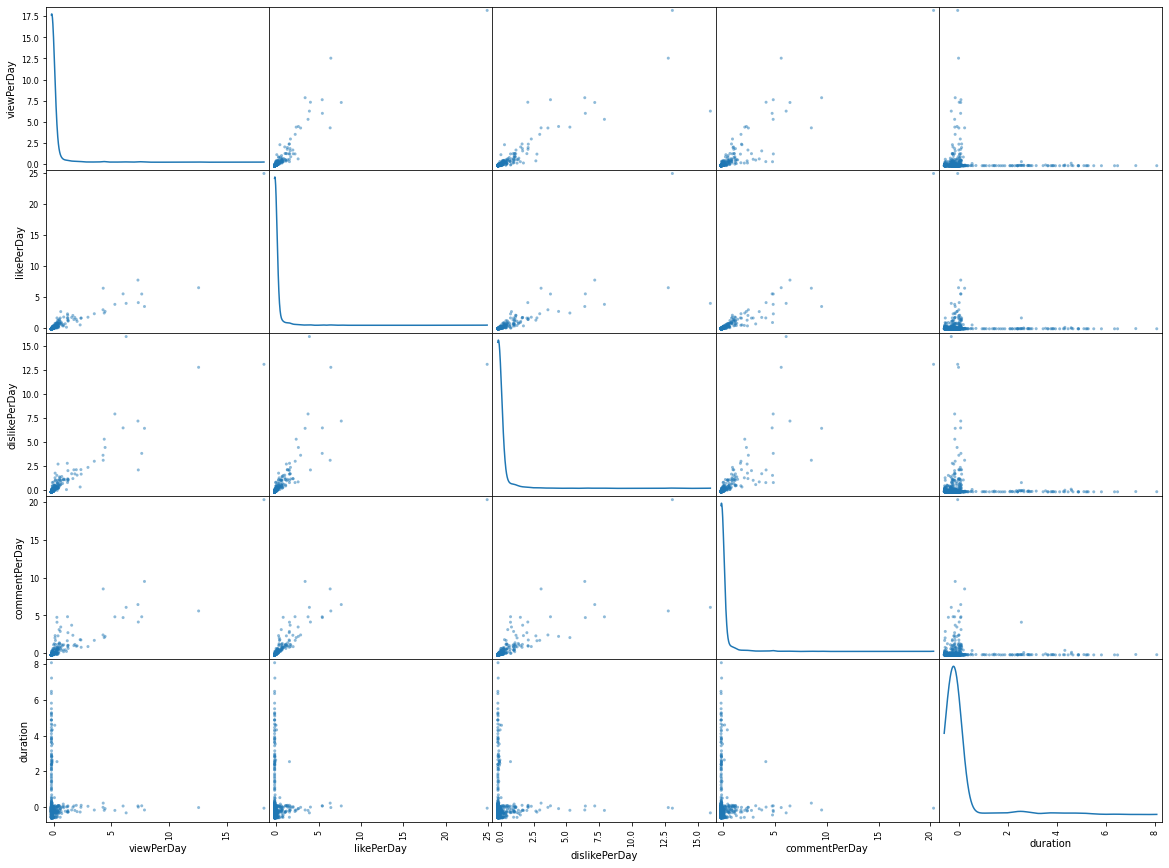

In [13]:
scaler = StandardScaler()
pd.plotting.scatter_matrix(pd.DataFrame(scaler.fit_transform(df), 
                                        columns=df.columns), diagonal="kde", figsize=(20, 15))
plt.show()

### Các cột không phải dạng số

Tạm thời, ta chưa xét đến cột `title` và `thumbnailUrl`, mặc dù hai cột có ảnh hưởng đến lượt xem và cảm nhận ban đầu của người xem (clickbait).

#### Phân bố các cột

In [14]:
pd.set_option('display.max_colwidth', 100) # Để nhìn rõ hơn
cate_cols = list(set(test_df.columns) - set(nume_cols) - set(['title', 'thumbnailUrl']))
df = test_df[cate_cols]
def num_values(df):
    return df.nunique()
def value_percentages(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_percentage, num_values, value_percentages])

,tags,license,definition,categoryId,licensedContent,embeddable,publicStatsViewable,madeForKids,uploadStatus,privacyStatus,projection,contentRating,dimension,caption,defaultAudioLanguage,topicCategories
missing_percentage,0.699301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3996
num_values,419,1,2,1,2,2,1,1,1,1,1,2,1,2,1,35
value_percentages,"{'['hindi songs', '2021 hindi songs', 'new hindi songs', '2021 new songs', 't-series', 'tseries'...",{'youtube': 100.0},"{'hd': 99.9, 'sd': 0.1}",{10: 100.0},"{True: 96.3, False: 3.7}","{True: 93.3, False: 6.7}",{False: 100.0},{False: 100.0},{'processed': 100.0},{'public': 100.0},{'rectangular': 100.0},"{'{}': 99.9, '{'ytRating': 'ytAgeRestricted'}': 0.1}",{'2d': 100.0},"{False: 99.7, True: 0.3}",{'hi': 100.0},"{'['https://en.wikipedia.org/wiki/Music', 'https://en.wikipedia.org/wiki/Music_of_Asia']': 62.9,..."


Như vậy, ta chỉ cần giữ lại các cột `tags`, `topicCategories` và `embeddable` để xử lý tiếp, vì các cột còn lại có phân bố rất giống nhau:
- Cột `embeddable` có dạng bool nên ta không cần xử lý gì nữa.

In [15]:
# Xem phân bố các tags
video_df['tags'].str.extractall(r"'([a-zA-z\s]+)\'").value_counts().head(20)

hindi songs                726
bollywood songs            703
new hindi songs            699
tseries                    698
hindi movie songs          694
tseries songs              682
film songs                 658
new song                   655
songs                       41
tulsi kumar                 41
latest songs                35
tseries movies              34
new songs                   32
movie clip                  32
jubin nautiyal new song     31
bollywood movie clips       27
clips movies                27
official song               27
movie clips bollywood       27
hindi movie clips           27
dtype: int64

- Cột `tags`: tạm thời chưa xử lý vì các tags tương đối nhiều và phức tạp => có thể cần NLP.

In [16]:
# Xem phân bố các topics
video_df['topicCategories'].str.extractall(r"wiki/([a-zA-z]+)\'").value_counts()

Music                 763
Music_of_Asia         706
Entertainment         228
Film                  215
Pop_music              34
Electronic_music       32
Independent_music      27
Television_program     11
Hip_hop_music           8
Performing_arts         5
Society                 3
Reggae                  1
Rhythm_and_blues        1
Soul_music              1
dtype: int64

- Cột `topicCategories`: trong mỗi value cũng bao gồm rất nhiều topic, nên ta cần xem các topic này mang lại ý nghĩa gì. Ta cũng cần lược bỏ phần chuỗi không cần thiết.

> Như vậy ta sẽ tùy chỉnh số lượng topic qua biến `num_top_topics` ở phần tiền xử lý tiếp theo.

#### Tiền xử lý các cột không phải dạng số

Tóm lại, trong class `ColAdderDropper` ta sẽ:
- Bỏ các cột không cần thiết, chỉ giữ lại các cột `tags`, `topicCategories` và `embeddable`.
- Cột `topicCategories` ta chọn `num_top_topics` số topic cần giữ lại.

In [17]:
# Tham khảo từ code HW3
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_topics=1):
        self.num_top_topics = num_top_topics
        
    def fit(self, X_df, y=None):
        topic_col = X_df.topicCategories.str.extractall(r"wiki/([a-zA-z]+)\'")
        self.topic_counts_ = topic_col.value_counts()
        topics = list(self.topic_counts_.index)
        self.top_topics_ = [item[0] for item in 
                            topics[:max(1, min(self.num_top_topics, len(topics)))]]
        return self
    def transform(self, X_df, y=None):
        fewer_cols_X_df = X_df.drop(list(set(X_df.columns) - set(nume_cols + ['embeddable'])), 
                                         axis=1)
        
        # Handle topics                            
        for topic in self.top_topics_:
            fewer_cols_X_df[topic] = None
            for index in fewer_cols_X_df.index:
                if (X_df.topicCategories.loc[index] is not np.nan) and \
                (topic in X_df.topicCategories.loc[index]):
                    fewer_cols_X_df.loc[index, topic] = 1
                else:
                    fewer_cols_X_df.loc[index, topic] = 0
        return fewer_cols_X_df

Test xử lý cột dạng số + categorical

In [18]:
# Xử lý cột dạng số
nume_trans = FunctionTransformer(func=convert_nume_col)
# Xử lý cột dạng categorical
cate_trans = ColAdderDropper(num_top_topics=1)

col_trans_pipeline = make_pipeline(nume_trans, cate_trans)
test_df = col_trans_pipeline.fit_transform(video_df)
test_df.head()

,viewPerDay,likePerDay,dislikePerDay,commentPerDay,embeddable,duration,Music
id,,,,,,,
vuoaLan88i4,179485.0,6622.0,485.0,1335.0,True,94,1
oxTJkkcqk7M,132497.0,3757.0,179.0,515.0,True,19,1
9qXBo2-rUHk,183296.0,11451.0,273.0,1161.0,True,1559,1
_VR6rWWL-9g,24422.0,534.0,61.0,138.0,True,257,0
ZFUr3nN8GR8,118201.0,3569.0,414.0,605.0,True,29,1


### Tạo pipeline cho toàn bộ bước tiền xử lý

In [19]:
# Chuẩn hóa
scaler = StandardScaler()

preprocess_pipeline = make_pipeline(col_trans_pipeline, scaler)

## Sử dụng K-means để gom nhóm các videos

### Tạo full pipeline cho mô hình

In [20]:
# K-means model
kmeans_model = KMeans(n_clusters=10, 
                      random_state=0)

# Tạo pipeline cho toàn bộ mô hình
full_pipeline = make_pipeline(preprocess_pipeline, kmeans_model)
full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('functiontransformer',
                                                   FunctionTransformer(func=<function convert_nume_col at 0x0000029C42B2BB80>)),
                                                  ('coladderdropper',
                                                   ColAdderDropper())])),
                                 ('standardscaler', StandardScaler())])),
                ('kmeans', KMeans(n_clusters=10, random_state=0))])

### Thử nghiệm để tìm ra số cluster phù hợp

Ta dùng phương pháp Elbow, lần lượt thử nghiệm số k clusters để tìm ra số lượng cluster phù hợp (3->20).

Tham khảo từ https://cafedev.vn/tu-hoc-ml-phuong-phap-elbow-cho-gia-tri-toi-uu-cua-k-trong-kmeans/

In [21]:
# Thử nghiệm các k cluster khác nhau
list_n_clusters = [3, 5, 7, 10, 13, 15, 17, 20]
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

prep_X = preprocess_pipeline.fit_transform(video_df)

for k in list_n_clusters: 
    # Set lại param n_clusters 
    full_pipeline.set_params(kmeans__n_clusters=k)
    full_pipeline.fit(video_df)
    
    # Tính các khoảng cách giữa các cluster và trong cùng một cluster
    distortions.append(sum(np.min(cdist(prep_X, full_pipeline.named_steps['kmeans'].cluster_centers_, 
                      'euclidean'),axis=1)) / prep_X.shape[0]) 
    inertias.append(full_pipeline.named_steps['kmeans'].inertia_) 
  
    mapping1[k] = sum(np.min(cdist(prep_X, full_pipeline.named_steps['kmeans'].cluster_centers_, 
                 'euclidean'),axis=1)) / prep_X.shape[0] 
    mapping2[k] = full_pipeline.named_steps['kmeans'].inertia_

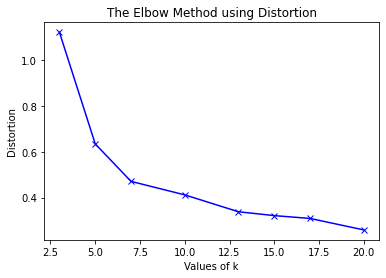

In [22]:
# Trực quan hóa Elbow
plt.plot(list_n_clusters, distortions, 'bx-') 
plt.xlabel('Values of k') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

> Vậy để số lượng cụm tối ưu, ta chọn giá trị tại "khuỷu tay" `k=7`.

### Set lại giá trị k tốt nhất cho mô hình

In [23]:
k = 7 # Best k clusters

full_pipeline.set_params(kmeans__n_clusters=k)
preds = full_pipeline.fit_predict(video_df)

print(f'Result for {k} clusters: ')
print(pd.Series(preds).value_counts())
print('\n')

Result for 7 clusters: 
0    666
3    162
4     66
5     52
6     45
1      9
2      1
dtype: int64




### Trực quan hóa kết quả phân cụm

Chọn các video được phân vào cụm 0 và cụm 3 để trực quan, vì đây là 2 cụm có nhiều video nhất.

In [24]:
test_df = col_trans_pipeline.fit_transform(video_df)
test_df['label'] = preds
most_df = test_df[(test_df['label']==0) | (test_df['label']==3)]

Tương quan biến `viewPerDay` và `likePerDay` với nhãn là 2 cụm được chọn.

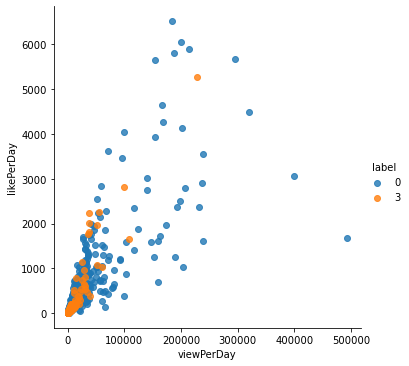

In [25]:
sns.lmplot(x="viewPerDay", y="likePerDay", data=most_df, hue='label', fit_reg=False)

Tương quan biến `viewPerDay` và `duration`.

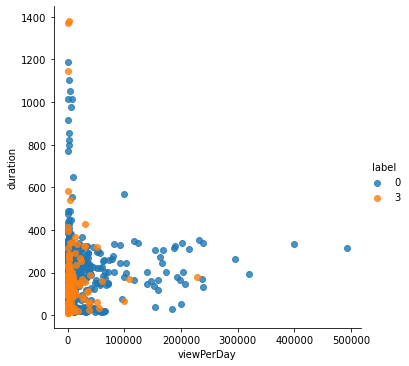

In [26]:
sns.lmplot(x="viewPerDay", y="duration", data=most_df, hue='label', fit_reg=False)

Tương quan biến `viewPerDay` và `Music`.

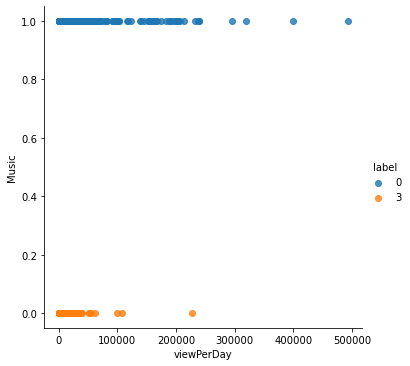

In [27]:
sns.lmplot(x="viewPerDay", y="Music", data=most_df, hue='label', fit_reg=False)

Tương quan của các biến ở cụm 4, 5 và 6

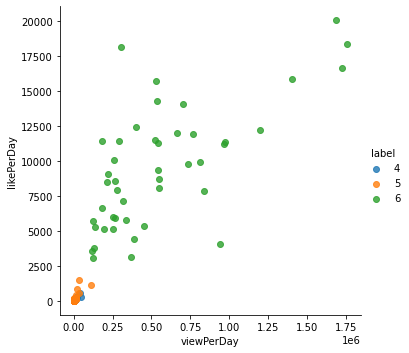

In [28]:
mid_df = test_df[(test_df['label']==4) | (test_df['label']==5) | (test_df['label']==6)]
sns.lmplot(x="viewPerDay", y="likePerDay", data=mid_df, hue='label', fit_reg=False)

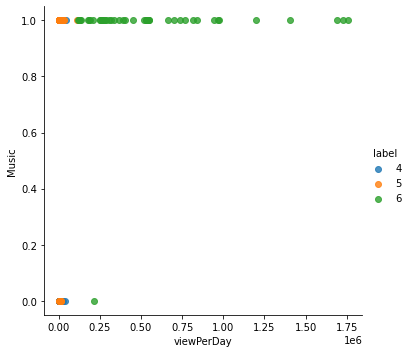

In [29]:
sns.lmplot(x="viewPerDay", y="Music", data=mid_df, hue='label', fit_reg=False)

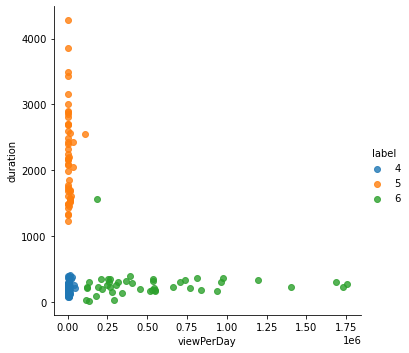

In [30]:
sns.lmplot(x="viewPerDay", y="duration", data=mid_df, hue='label', fit_reg=False)